In [1]:
import pandas as pd

import numpy as np

import scipy

import os

import seaborn as sns

from matplotlib import pyplot as plt

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier

from mlxtend.frequent_patterns import apriori, association_rules

from sklearn.preprocessing import OneHotEncoder, StandardScaler,normalize,LabelEncoder, MinMaxScaler

from sklearn.model_selection import cross_val_score, train_test_split

from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, classification_report, confusion_matrix, plot_confusion_matrix


import warnings
warnings.filterwarnings('ignore')

In [2]:
organic = pd.read_csv('organic.csv')

In [3]:
organic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10246494 entries, 0 to 10246493
Data columns (total 20 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   user_id                 int64  
 1   order_number            int64  
 2   order_id                int64  
 3   product_id              int64  
 4   product_name            object 
 5   aisle_id                int64  
 6   aisle                   object 
 7   department_id           int64  
 8   department              object 
 9   days_since_prior_order  float64
 10  order_dow               int64  
 11  day_of_week             object 
 12  is_weekend              int64  
 13  order_hour_of_day       int64  
 14  day_period              object 
 15  add_to_cart_order       int64  
 16  add_to_cart_order_c     int64  
 17  organic                 int64  
 18  organic_produce         int64  
 19  reordered               int64  
dtypes: float64(1), int64(14), object(5)
memory usage: 1.5+ GB


In [6]:
organic['day_period'].value_counts()

2    4157527
1    3617162
3    2471805
Name: day_period, dtype: int64

In [5]:
# Mapping for day_period
day_period_mapping = {'Morning': 1, 'Afternoon': 2, 'Night': 3}

# Apply mapping to the day_period column
organic['day_period'] = organic['day_period'].map(day_period_mapping)

In [7]:
organic = organic.drop(['product_name', 'aisle', 'department', 'day_of_week'], axis=1)


In [8]:
organic.shape

(10246494, 16)

** **
## Modeling

In [9]:
# Define the fraction of the dataset you want to sample
sample_fraction = 0.05

# Taking a random sample from the entire dataset
organic_sample = organic.sample(frac=sample_fraction, random_state=42)

# Creating a new DataFrame containing the data not included in the sample
organic_rem = organic.drop(organic_sample.index)

In [11]:
# Separate features and target
X = organic_sample.drop('reordered', axis=1)
y = organic_sample['reordered']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

** **
## Decision Tree Classifier

F1-Score: 0.7350086239568105
Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.55      0.55     37358
           1       0.74      0.73      0.74     65107

    accuracy                           0.67    102465
   macro avg       0.64      0.64      0.64    102465
weighted avg       0.67      0.67      0.67    102465



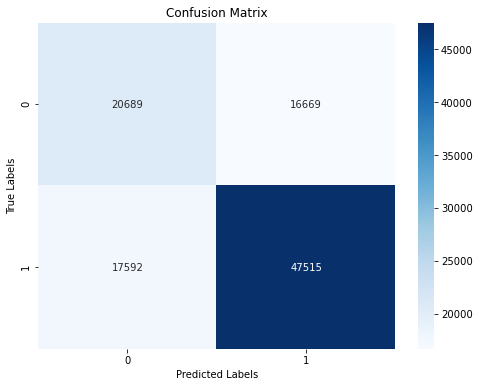

In [58]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)

y_pred = tree.predict(X_test)
f1 = f1_score(y_pred, y_test)
print("F1-Score:", f1)

# Display classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

** **
## XGBoost Classifier

F1-Score: 0.8248491302804402
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.53      0.62     37358
           1       0.77      0.89      0.82     65107

    accuracy                           0.76    102465
   macro avg       0.75      0.71      0.72    102465
weighted avg       0.76      0.76      0.75    102465



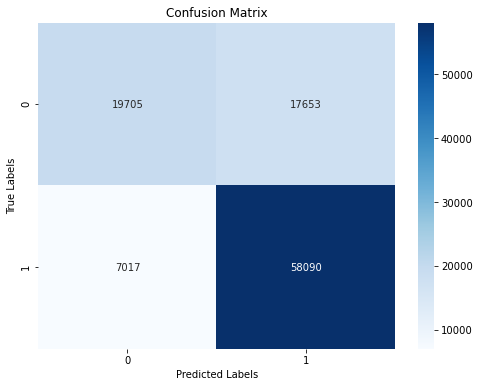

In [59]:
import xgboost as xgb
from sklearn.metrics import f1_score

# Create the XGBClassifier model
xgb_model = xgb.XGBClassifier()

# Fit the model to the training data
xgb_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = xgb_model.predict(X_test)

# Calculate the F1 score
f1 = f1_score(y_test, y_pred)
# Print the results
print("F1-Score:", f1)

# Display classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

## Word2Vec

In [ ]:
from gensim.models import Word2Vec